In [28]:
# num_samples_per_class
# inputs: np.vstack
# targets
# scatter plot inputs and targets
# W and b
# model (forward pass)
# squared loss
# gradient of loss with respect to weights
# update weights
# full traning loop = fit
# accuracy
import numpy as np
import tensorflow as tf

In [29]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean = [0, 3],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class
)

positive_samples = np.random.multivariate_normal(
    mean = [3, 0],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class
)

In [30]:
inputs = np.vstack((negative_samples, positive_samples), dtype = "float32")

In [31]:
inputs.shape

(2000, 2)

In [32]:
# inputs[0:1000, 0]

In [33]:
targets = np.vstack(
    (np.zeros((num_samples_per_class, 1), dtype = "float32"),
    np.ones((num_samples_per_class, 1), dtype = "float32"))
)

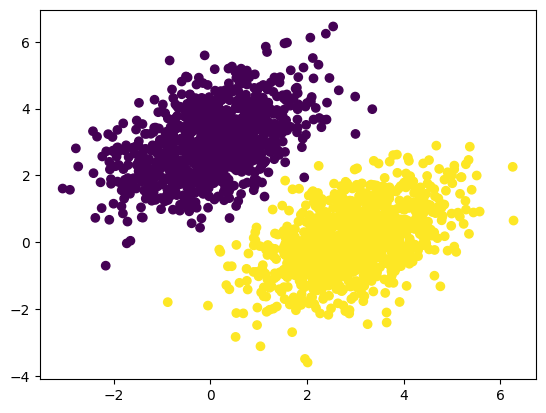

In [34]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c = targets[:,0])
plt.show()

In [44]:
input_dim = 2
output_dim = 1

W = tf.Variable(tf.random.uniform(shape = (input_dim, output_dim)))
b = tf.Variable(tf.zeros(output_dim,))

In [45]:
def model(inputs):
  return tf.matmul(inputs, W) + b

In [46]:
def squared_loss(predictions, targets):
  per_sample_losses = tf.square(predictions - targets)
  return tf.reduce_mean(per_sample_losses)

In [47]:
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = squared_loss(predictions, targets)
  grad_of_loss_wrt_W, grad_of_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_of_loss_wrt_W * learning_rate)
  b.assign_sub(grad_of_loss_wrt_b * learning_rate)
  return loss

In [49]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step+1}: {loss:.4f}")

Loss at step 1: 0.0313
Loss at step 2: 0.0309
Loss at step 3: 0.0305
Loss at step 4: 0.0301
Loss at step 5: 0.0298
Loss at step 6: 0.0295
Loss at step 7: 0.0292
Loss at step 8: 0.0289
Loss at step 9: 0.0287
Loss at step 10: 0.0285
Loss at step 11: 0.0283
Loss at step 12: 0.0281
Loss at step 13: 0.0279
Loss at step 14: 0.0278
Loss at step 15: 0.0277
Loss at step 16: 0.0275
Loss at step 17: 0.0274
Loss at step 18: 0.0273
Loss at step 19: 0.0272
Loss at step 20: 0.0271
Loss at step 21: 0.0270
Loss at step 22: 0.0270
Loss at step 23: 0.0269
Loss at step 24: 0.0268
Loss at step 25: 0.0268
Loss at step 26: 0.0267
Loss at step 27: 0.0267
Loss at step 28: 0.0266
Loss at step 29: 0.0266
Loss at step 30: 0.0265
Loss at step 31: 0.0265
Loss at step 32: 0.0265
Loss at step 33: 0.0265
Loss at step 34: 0.0264
Loss at step 35: 0.0264
Loss at step 36: 0.0264
Loss at step 37: 0.0264
Loss at step 38: 0.0263
Loss at step 39: 0.0263
Loss at step 40: 0.0263


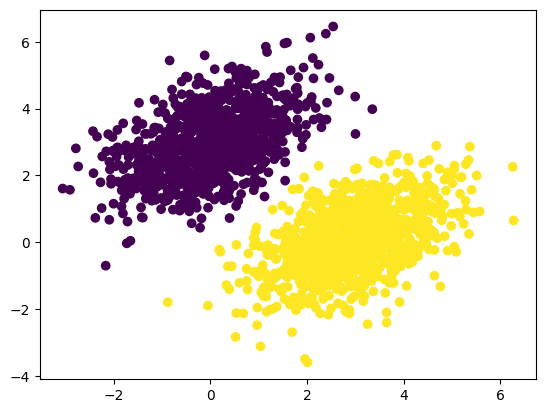

In [50]:
predictions = model(inputs) # prediction = w1.x + w2.y +b

plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:, 0] > 0.5)
plt.show()

In [51]:
W.shape

TensorShape([2, 1])

In [55]:
W

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[ 0.15879142],
       [-0.14422403]], dtype=float32)>

In [56]:
b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.4766886], dtype=float32)>

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.4766886], dtype=float32)>


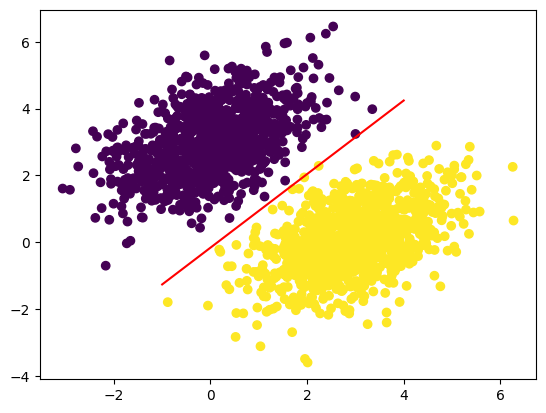

In [54]:
x = np.linspace(-1, 4, 100)

y = (0.5 - b) / W[1] - W[0] / W[1] * x

plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:, 0] > 0.5)
